In [1]:
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
np.shape(x_train)

(60000, 28, 28)

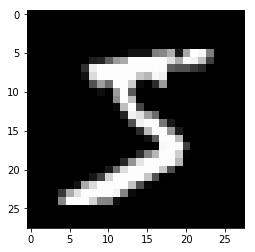

In [22]:
from matplotlib import pyplot as plt

plt.imshow(x_train[0])

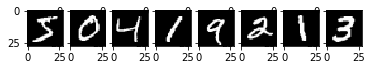

In [19]:
columns = 8
fig = plt.figure()
for i in range(1, columns + 1):
    fig.add_subplot(1, columns, i)
    plt.imshow(x_train[i-1])
plt.gray()

In [4]:
np.shape(y_train)

(60000,)

In [5]:
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [6]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train) 
y_train_onehot[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [7]:
x_train_1D = x_train.reshape(60000, 28*28)
np.shape(x_train_1D)

(60000, 784)

In [8]:
x_train_1D[0][0:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
x_train_norm = x_train_1D/255

In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(x=x_train_1D, y=y_train_onehot, epochs=10, batch_size=100)

Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.9096 - acc: 0.7736
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.4747 - acc: 0.8849
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3849 - acc: 0.9022
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3411 - acc: 0.9116
Epoch 5/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3113 - acc: 0.9171
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2910 - acc: 0.9213
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2725 - acc: 0.9259
Epoch 8/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2618 - acc: 0.9279
Epoch 9/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2477 - acc: 0.9322
Epoch 10/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2384 - acc: 0.9345

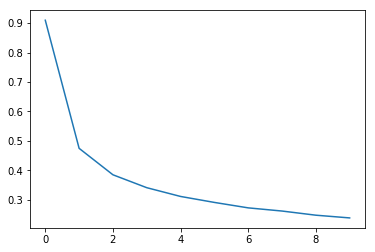

In [20]:
plt.plot(train_history.history['loss'])

In [12]:
np.shape(x_test)

(10000, 28, 28)

In [13]:
x_test_1D = x_test.reshape(10000, 28*28)
x_test_norm = x_test_1D/255

In [14]:
y_test_onehot = np_utils.to_categorical(y_test) 

In [15]:
model.evaluate(x=x_test_1D, y=y_test_onehot)

10000/10000 [==============================] - 0s 41us/step


[0.23903799626231192, 0.93520000000000003]

In [16]:
model.predict(x_test_1D[0:1,:])

array([[  4.05503844e-04,   1.04319130e-04,   8.89745133e-04,
          3.35068488e-03,   5.62443456e-05,   2.80957960e-04,
          2.06918303e-05,   9.93681669e-01,   1.64935598e-04,
          1.04529166e-03]], dtype=float32)

In [17]:
model.predict_classes(x_test_1D[0:1,:])

array([7])

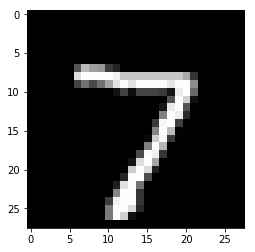

In [18]:
plt.imshow(x_test[0])